<a href="https://colab.research.google.com/github/AgaWoj/Machine-Learning/blob/main/PrzygotowanieDanych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://github.com/krakowiakpawel9/machine-learning-bootcamp/blob/master/supervised/01_basics/01_preprocessing.ipynb

## https://scikit-learn.org/stable/

### https://scikit-learn.org/stable/user_guide.html

In [ ]:
import numpy as np
import pandas as pd
import sklearn

In [ ]:
sklearn.__version__

'1.2.2'

# Wygenerowanie danych

In [ ]:
data = {'size': ['XL', 'L', 'M', 'L', 'M'],
        'color': ['red', 'green', 'blue', 'green', 'red'],
        'gender': ['female', 'male', 'male', 'female', 'female'],
        'price': [199.0, 89.0, 99.0, 129.0, 79.0],
        'weight': [500, 450, 300, 380, 410],
        'bought': ['yes', 'no', 'yes', 'no', 'yes']}

In [ ]:
df_row = pd.DataFrame(data)
df_row

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500,yes
1,L,green,male,89.0,450,no
2,M,blue,male,99.0,300,yes
3,L,green,female,129.0,380,no
4,M,red,female,79.0,410,yes


# Utworzenie kopii danych

In [ ]:
df = df_row.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500,yes
1,L,green,male,89.0,450,no
2,M,blue,male,99.0,300,yes
3,L,green,female,129.0,380,no
4,M,red,female,79.0,410,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   5 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  5 non-null      int64  
 5   bought  5 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 368.0+ bytes


# Zmiana typu danych

In [ ]:
for col in ['size', 'color', 'gender', 'bought']:
  df[col] = df[col].astype('category')
  # zmiana typu danych z object na category

df['weight'] = df['weight'].astype('float')
# zmiana typu danych z int na float

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   size    5 non-null      category
 1   color   5 non-null      category
 2   gender  5 non-null      category
 3   price   5 non-null      float64 
 4   weight  5 non-null      float64 
 5   bought  5 non-null      category
dtypes: category(4), float64(2)
memory usage: 740.0 bytes


In [ ]:
df.describe()

,price,weight
count,5.000000,5.000000
mean,119.000000,408.000000
std,48.476799,75.299402
min,79.000000,300.000000
25%,89.000000,380.000000
50%,99.000000,410.000000
75%,129.000000,450.000000
max,199.000000,500.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,5.0,119.0,48.476799,79.0,89.0,99.0,129.0,199.0
weight,5.0,408.0,75.299402,300.0,380.0,410.0,450.0,500.0


In [ ]:
df.describe(include=['category']).T

,count,unique,top,freq
size,5,3,L,2
color,5,3,green,2
gender,5,2,female,3
bought,5,2,yes,3


# LabelEncoder

In [ ]:
# przygotowanie danych do modelu uczenia maszynowego

# tej metody używam tylko przy targecie - czyli odpowiadam na pytanie czy kupi czy nie?

from sklearn.preprocessing import LabelEncoder


In [ ]:
# chcę przemapować zmienną 'bought' czy ktoś kupił czy nie, tam gdzie yes to chcę 1 tam gdzie nie to 0

le = LabelEncoder()
le.fit(df['bought'])
# metoda fit dopasuje encoder do zmiennej bought
le.transform(df['bought'])

array([1, 0, 1, 0, 1])

In [ ]:
le.fit_transform(df['bought'])

array([1, 0, 1, 0, 1])

In [ ]:
le.classes_

array(['no', 'yes'], dtype=object)

In [ ]:
# muszę to na stałę przypisać do modelu

df['bought'] = le.fit_transform(df['bought'])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,1
1,L,green,male,89.0,450.0,0
2,M,blue,male,99.0,300.0,1
3,L,green,female,129.0,380.0,0
4,M,red,female,79.0,410.0,1


In [ ]:
# jak chcę wrócić do pierwotnej postaci

le.inverse_transform(df['bought'])

array(['yes', 'no', 'yes', 'no', 'yes'], dtype=object)

In [ ]:
# przypisanie trwale do obiektu df

df['bought'] = le.inverse_transform(df['bought'])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,male,99.0,300.0,yes
3,L,green,female,129.0,380.0,no
4,M,red,female,79.0,410.0,yes


# Kodowanie zmiennych objaśniających

## OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(df[['size']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [ ]:
encoder.transform(df[['size']])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
encoder.categories_

[array(['L', 'M', 'XL'], dtype=object)]

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
encoder.fit(df[['size']])
encoder.transform(df[['size']])

# drop first usówa pierwszą z dwóch kolumn
# mam n-1 kolumn, które zostały zakodowane

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.]])

In [ ]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,male,99.0,300.0,yes
3,L,green,female,129.0,380.0,no
4,M,red,female,79.0,410.0,yes


# Pandas get_dummies()

In [ ]:
pd.get_dummies(data=df)

# funkcja get_dummies zakodowała wszystkie zmienne kategoryczne

,price,weight,size_L,size_M,size_XL,color_blue,color_green,color_red,gender_female,gender_male,bought_no,bought_yes
0,199.0,500.0,False,False,True,False,False,True,True,False,False,True
1,89.0,450.0,True,False,False,False,True,False,False,True,True,False
2,99.0,300.0,False,True,False,True,False,False,False,True,False,True
3,129.0,380.0,True,False,False,False,True,False,True,False,True,False
4,79.0,410.0,False,True,False,False,False,True,True,False,False,True


In [ ]:
pd.get_dummies(data=df, drop_first=True)
# usówa pierwszy

,price,weight,size_M,size_XL,color_green,color_red,gender_male,bought_yes
0,199.0,500.0,False,True,False,True,False,True
1,89.0,450.0,False,False,True,False,True,False
2,99.0,300.0,True,False,False,False,True,True
3,129.0,380.0,False,False,True,False,False,False
4,79.0,410.0,True,False,False,True,False,True


In [ ]:
pd.get_dummies(data=df, drop_first=True, prefix='new')

,price,weight,new_M,new_XL,new_green,new_red,new_male,new_yes
0,199.0,500.0,False,True,False,True,False,True
1,89.0,450.0,False,False,True,False,True,False
2,99.0,300.0,True,False,False,False,True,True
3,129.0,380.0,False,False,True,False,False,False
4,79.0,410.0,True,False,False,True,False,True


In [ ]:
pd.get_dummies(data=df, drop_first=True, prefix_sep='-')

,price,weight,size-M,size-XL,color-green,color-red,gender-male,bought-yes
0,199.0,500.0,False,True,False,True,False,True
1,89.0,450.0,False,False,True,False,True,False
2,99.0,300.0,True,False,False,False,True,True
3,129.0,380.0,False,False,True,False,False,False
4,79.0,410.0,True,False,False,True,False,True


In [ ]:
# kodowanie tylko dla wybranych kolumn

pd.get_dummies(data=df, drop_first=True, columns=['size'])

,color,gender,price,weight,bought,size_M,size_XL
0,red,female,199.0,500.0,yes,False,True
1,green,male,89.0,450.0,no,False,False
2,blue,male,99.0,300.0,yes,True,False
3,green,female,129.0,380.0,no,False,False
4,red,female,79.0,410.0,yes,True,False


# Standaryzacja danych - StandardScaler

In [ ]:
print(f"{df['price']}\n")
print(f"Średnia: {df['price'].mean()}")
print(f"Odchylenie standardowe: {df['price'].std():.4f}")

0    199.0
1     89.0
2     99.0
3    129.0
4     79.0
Name: price, dtype: float64

Średnia: 119.0
Odchylenie standardowe: 48.4768


In [ ]:
# standaryzacja - dlatego że rozrzut zmiennych ma znaczenie (skla nie ma znaczenia), np jedna zmienna ma wartosc 1 a inna 500 rozrzut jest duży
# i może zasłonić cechy tej z 1

# standaryzacja to cena - średnia przez odchylenie standardowe

(df['price'] - df['price'].mean()) / df['price'].std()

0    1.650274
1   -0.618853
2   -0.412568
3    0.206284
4   -0.825137
Name: price, dtype: float64

In [ ]:
def standardize(x):
  return (x-x.mean()) / x.std()

standardize(df['price'])

0    1.650274
1   -0.618853
2   -0.412568
3    0.206284
4   -0.825137
Name: price, dtype: float64

In [ ]:
from sklearn.preprocessing import scale

scale(df['price'])

# gotowa funkcja standaryzacji z sklearn
# wartości się tu różnią

array([ 1.84506242, -0.69189841, -0.4612656 ,  0.2306328 , -0.92253121])

In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(df[['price']])
scale.transform(df[['price']])

# StandartScaler jest polecany do używania

array([[ 1.84506242],
       [-0.69189841],
       [-0.4612656 ],
       [ 0.2306328 ],
       [-0.92253121]])

In [ ]:
scaler_price = StandardScaler()
df['price'] = scaler_price.fit_transform(df[['price']])
scaler_weight = StandardScaler()
df['weight'] = scaler_weight.fit_transform(df[['weight']])

# ze standaryzowane wartości wstawiam do DataFrame

In [ ]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,1.845062,1.366002,yes
1,L,green,male,-0.691898,0.623610,no
2,M,blue,male,-0.461266,-1.603567,yes
3,L,green,female,0.230633,-0.415740,no
4,M,red,female,-0.922531,0.029696,yes


In [ ]:
# lub inny sposób

scaler = StandardScaler()

df[['price', 'weight']] = scaler.fit_transform(df[['price', 'weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,1.845062,1.366002,yes
1,L,green,male,-0.691898,0.623610,no
2,M,blue,male,-0.461266,-1.603567,yes
3,L,green,female,0.230633,-0.415740,no
4,M,red,female,-0.922531,0.029696,yes


# Przygotowanie danych do modelu

In [ ]:
df = df_row.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500,yes
1,L,green,male,89.0,450,no
2,M,blue,male,99.0,300,yes
3,L,green,female,129.0,380,no
4,M,red,female,79.0,410,yes


In [ ]:
le = LabelEncoder()


df['bought'] = le.fit_transform(df['bought'])

scaler = StandardScaler()
df[['price', 'weight']] = scaler.fit_transform(df[['price', 'weight']])

df = pd.get_dummies(data=df, drop_first=True)
df

,price,weight,bought,size_M,size_XL,color_green,color_red,gender_male
0,1.845062,1.366002,1,False,True,False,True,False
1,-0.691898,0.623610,0,False,False,True,False,True
2,-0.461266,-1.603567,1,True,False,False,False,True
3,0.230633,-0.415740,0,False,False,True,False,False
4,-0.922531,0.029696,1,True,False,False,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        5 non-null      float64
 1   weight       5 non-null      float64
 2   bought       5 non-null      int64  
 3   size_M       5 non-null      bool   
 4   size_XL      5 non-null      bool   
 5   color_green  5 non-null      bool   
 6   color_red    5 non-null      bool   
 7   gender_male  5 non-null      bool   
dtypes: bool(5), float64(2), int64(1)
memory usage: 273.0 bytes


In [ ]:
df[['size_M', 'size_XL', 'color_green', 'color_red', 'gender_male']] = df[['size_M', 'size_XL', 'color_green', 'color_red', 'gender_male']].astype(int)
df

,price,weight,bought,size_M,size_XL,color_green,color_red,gender_male
0,1.845062,1.366002,1,0,1,0,1,0
1,-0.691898,0.623610,0,0,0,1,0,1
2,-0.461266,-1.603567,1,1,0,0,0,1
3,0.230633,-0.415740,0,0,0,1,0,0
4,-0.922531,0.029696,1,1,0,0,1,0


# Braki danych

In [ ]:
dataDf = {'size': ['XL', 'L', 'M', np.nan, 'L', 'M'],
        'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
        'gender': ['female', 'male', np.nan, 'male', 'female', 'female'],
        'price': [199.0, 89.0, np.nan, 99.0, 129.0, 79.0],
        'weight': [500, 450, 300, np.nan, 410, np.nan],
        'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']}

In [ ]:
dataDf

{'size': ['XL', 'L', 'M', nan, 'L', 'M'],
 'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
 'gender': ['female', 'male', nan, 'male', 'female', 'female'],
 'price': [199.0, 89.0, nan, 99.0, 129.0, 79.0],
 'weight': [500, 450, 300, nan, 410, nan],
 'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']}

In [ ]:
Df = pd.DataFrame(data=dataDf)
Df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,99.0,NaN,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,NaN,no


# Jak sbie z nimi poradzić?

## usunąć wiersze z brakami
## zastąpić braki stałą wartością np. średnią, medianą (w tym celu stosujemy dane ze zbioru treningowego, zapobiega to wyciekowi danych ze zbioru testowego)
## wytrenowanie modelu w celu uzupełnienia braków


### przed wrzuceniem danych do modelu musimy je podzielić na zbiór testowy i treningowy

In [ ]:
df = Df.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,99.0,NaN,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,NaN,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


# Sprawdzenie czy braki istnieją

In [ ]:
df.isnull().astype(int)

,size,color,gender,price,weight,bought
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,1,1,0,0
3,1,0,0,0,1,0
4,0,0,0,0,0,0
5,0,0,0,0,1,0


In [ ]:
df.isnull()

# zwraca nam maskę logiczną

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [ ]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [ ]:
# jak jeszcze raz zsumuję to mam liczbę łącznie wszystkich braków danych w obiekcie DataFrame

In [ ]:
df.isnull().sum().sum()

5

In [ ]:
# sprawdzenie % braku danych

df.isnull().sum() / len(df) * 100

size      16.666667
color      0.000000
gender    16.666667
price     16.666667
weight    33.333333
bought     0.000000
dtype: float64

# SimpleImputer - to klasa która pomaga w prosty sposób uzupełniać braki danych

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# fit aby dopasować braki danych
imputer.fit(df[['weight']])

SimpleImputer()

In [ ]:
imputer.statistics_

# wyświetla medianę

array([415.])

In [ ]:
imputer.transform(df[['weight']])

# uzupełnione np.nan średnią = 415

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [ ]:
# zastępuje w ramce danych

df['weight'] = imputer.transform(df[['weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,99.0,415.0,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,415.0,no


In [ ]:
# strategy='constans' => chcemy wstawić stałą wartość

imputer = SimpleImputer(missing_values=np.nan, strategy = 'constant', fill_value=99.00)
imputer.fit_transform(df[['price']])

array([[199.],
       [ 89.],
       [ 99.],
       [ 99.],
       [129.],
       [ 79.]])

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='L')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['L'],
       ['M']], dtype=object)

In [ ]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,99.0,415.0,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,415.0,no


In [ ]:
# most_frequent - wstawia najczęstszy element który występuje dla danej zmiennej

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['L'],
       ['M']], dtype=object)

In [ ]:
df = Df.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,99.0,NaN,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,NaN,no


In [ ]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [ ]:
pd.isnull(df['weight'])

0    False
1    False
2    False
3     True
4    False
5     True
Name: weight, dtype: bool

In [ ]:
df[pd.isnull(df['weight'])]

# tylko wiersze z NaN w weight

,size,color,gender,price,weight,bought
3,NaN,green,male,99.0,NaN,no
5,M,green,female,79.0,NaN,no


In [ ]:
df[~pd.isnull(df['weight'])]

# tylko wiersze bez Nan w weight, wstaw znak tylda

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,L,red,female,129.0,410.0,yes


In [ ]:
pd.notnull(df['weight'])

# notnull - zwraca True gdzie dane są i False gdzie danych nie ma

0     True
1     True
2     True
3    False
4     True
5    False
Name: weight, dtype: bool

In [ ]:
df[pd.notnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,L,red,female,129.0,410.0,yes


In [ ]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,99.0,NaN,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,NaN,no


In [ ]:
# fillna - uzupełni braki automatycznie stałą wartością

df.fillna(value='brak')

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,green,male,99.0,brak,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,brak,no


In [ ]:
df.fillna(value=0.0)

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,0.0,0.0,300.0,yes
3,0.0,green,male,99.0,0.0,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,0.0,no


In [ ]:
df['size'].fillna(value='L', inplace=True)
df

# jeżeli przekażemy inplace=True to zmiany zostaną dokonane na kolumnie

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,male,99.0,NaN,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,NaN,no


In [ ]:
df.dropna()

# usuwa wiersze gdzie są braki

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,L,red,female,129.0,410.0,yes


In [ ]:
df = df.dropna()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,L,red,female,129.0,410.0,yes


# Braki danych w szeregach czasowych

In [ ]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

# index-em jest data i godzina

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


In [ ]:
# import bibliotek do wykresów

from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
register_matplotlib_converters()

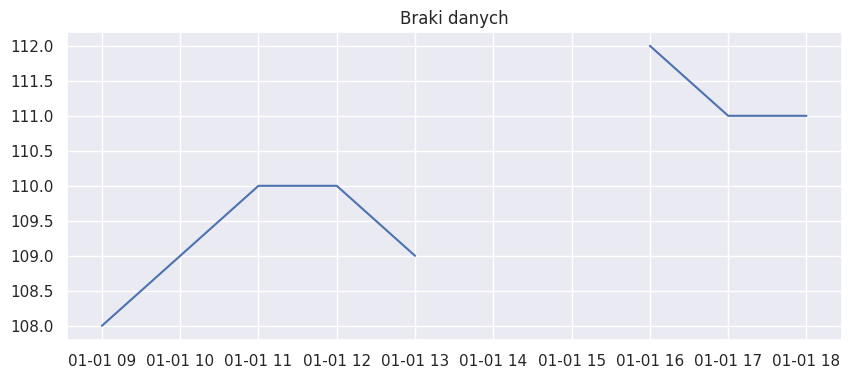

In [ ]:
plt.figure(figsize=(10,4))
plt.title('Braki danych')
_ = plt.plot(df.price)

In [ ]:
import plotly.express as px

In [ ]:
df_plotly = df.reset_index()
df_plotly

,index,price
0,2020-01-01 09:00:00,108.0
1,2020-01-01 10:00:00,109.0
2,2020-01-01 11:00:00,110.0
3,2020-01-01 12:00:00,110.0
4,2020-01-01 13:00:00,109.0
5,2020-01-01 14:00:00,NaN
6,2020-01-01 15:00:00,NaN
7,2020-01-01 16:00:00,112.0
8,2020-01-01 17:00:00,111.0
9,2020-01-01 18:00:00,111.0


In [ ]:
px.line(df_plotly, 'index', 'price', width=600, height=400, title='Szeregi czasowe - braki danych')

# Usunięcie braków danych

In [ ]:
# dropna

df_plotly = df_plotly.dropna()
df_plotly

,index,price
0,2020-01-01 09:00:00,108.0
1,2020-01-01 10:00:00,109.0
2,2020-01-01 11:00:00,110.0
3,2020-01-01 12:00:00,110.0
4,2020-01-01 13:00:00,109.0
7,2020-01-01 16:00:00,112.0
8,2020-01-01 17:00:00,111.0
9,2020-01-01 18:00:00,111.0


In [ ]:
px.line(df_plotly, 'index', 'price', width=600, height=400, title='Szeregi czasowe - braki danych')

# Wypełnienie braków stałą wartością 0

In [ ]:
df_plotly = df.reset_index()
df_plotly

,index,price
0,2020-01-01 09:00:00,108.0
1,2020-01-01 10:00:00,109.0
2,2020-01-01 11:00:00,110.0
3,2020-01-01 12:00:00,110.0
4,2020-01-01 13:00:00,109.0
5,2020-01-01 14:00:00,NaN
6,2020-01-01 15:00:00,NaN
7,2020-01-01 16:00:00,112.0
8,2020-01-01 17:00:00,111.0
9,2020-01-01 18:00:00,111.0


In [ ]:
df_plotly['price_fill'] = df_plotly['price'].fillna(0)
df_plotly

,index,price,price_fill
0,2020-01-01 09:00:00,108.0,108.0
1,2020-01-01 10:00:00,109.0,109.0
2,2020-01-01 11:00:00,110.0,110.0
3,2020-01-01 12:00:00,110.0,110.0
4,2020-01-01 13:00:00,109.0,109.0
5,2020-01-01 14:00:00,NaN,0.0
6,2020-01-01 15:00:00,NaN,0.0
7,2020-01-01 16:00:00,112.0,112.0
8,2020-01-01 17:00:00,111.0,111.0
9,2020-01-01 18:00:00,111.0,111.0


In [ ]:
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - braki danych - wstawienie 0')
# ten sposób wywala wykres

# Wypełnienie braków danych średnią

In [ ]:
df_plotly = df.reset_index()
df_plotly['price_fill_mean']  = df_plotly['price'].fillna(df_plotly['price'].mean())
df_plotly

,index,price,price_fill_mean
0,2020-01-01 09:00:00,108.0,108.0
1,2020-01-01 10:00:00,109.0,109.0
2,2020-01-01 11:00:00,110.0,110.0
3,2020-01-01 12:00:00,110.0,110.0
4,2020-01-01 13:00:00,109.0,109.0
5,2020-01-01 14:00:00,NaN,110.0
6,2020-01-01 15:00:00,NaN,110.0
7,2020-01-01 16:00:00,112.0,112.0
8,2020-01-01 17:00:00,111.0,111.0
9,2020-01-01 18:00:00,111.0,111.0


In [ ]:
px.line(df_plotly, 'index', 'price_fill_mean', width=600, height=400, title='Szeregi czasowe - braki danych - wstawienie mean')

# Metoda interpolacji

In [ ]:
df_plotly = df.reset_index()
df_plotly['price_fill_interpolation'] = df_plotly['price'].interpolate()
df_plotly

,index,price,price_fill_interpolation
0,2020-01-01 09:00:00,108.0,108.0
1,2020-01-01 10:00:00,109.0,109.0
2,2020-01-01 11:00:00,110.0,110.0
3,2020-01-01 12:00:00,110.0,110.0
4,2020-01-01 13:00:00,109.0,109.0
5,2020-01-01 14:00:00,NaN,110.0
6,2020-01-01 15:00:00,NaN,111.0
7,2020-01-01 16:00:00,112.0,112.0
8,2020-01-01 17:00:00,111.0,111.0
9,2020-01-01 18:00:00,111.0,111.0


In [ ]:
px.line(df_plotly, 'index', 'price_fill_interpolation', width=600, height=400, title='Szeregi czasowe - braki danych - interpolacja')

# wypełnieie metodą backward fill

In [ ]:
df_plotly = df.reset_index()
df_plotly

,index,price
0,2020-01-01 09:00:00,108.0
1,2020-01-01 10:00:00,109.0
2,2020-01-01 11:00:00,110.0
3,2020-01-01 12:00:00,110.0
4,2020-01-01 13:00:00,109.0
5,2020-01-01 14:00:00,NaN
6,2020-01-01 15:00:00,NaN
7,2020-01-01 16:00:00,112.0
8,2020-01-01 17:00:00,111.0
9,2020-01-01 18:00:00,111.0


In [ ]:
df_plotly['price_fill'] = df_plotly['price'].fillna(method='ffill')
df_plotly

,index,price,price_fill
0,2020-01-01 09:00:00,108.0,108.0
1,2020-01-01 10:00:00,109.0,109.0
2,2020-01-01 11:00:00,110.0,110.0
3,2020-01-01 12:00:00,110.0,110.0
4,2020-01-01 13:00:00,109.0,109.0
5,2020-01-01 14:00:00,NaN,109.0
6,2020-01-01 15:00:00,NaN,109.0
7,2020-01-01 16:00:00,112.0,112.0
8,2020-01-01 17:00:00,111.0,111.0
9,2020-01-01 18:00:00,111.0,111.0


In [ ]:
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - braki danych - forward fill')

In [ ]:
df_plotly['price_fill'] = df_plotly['price'].fillna(method='bfill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - braki danych - forward fill')
# wstawia nam to co widziała ostatnio

In [ ]:
df_plotly

,index,price,price_fill
0,2020-01-01 09:00:00,108.0,108.0
1,2020-01-01 10:00:00,109.0,109.0
2,2020-01-01 11:00:00,110.0,110.0
3,2020-01-01 12:00:00,110.0,110.0
4,2020-01-01 13:00:00,109.0,109.0
5,2020-01-01 14:00:00,NaN,112.0
6,2020-01-01 15:00:00,NaN,112.0
7,2020-01-01 16:00:00,112.0,112.0
8,2020-01-01 17:00:00,111.0,111.0
9,2020-01-01 18:00:00,111.0,111.0
